In [20]:
import numpy as np
from PIL import Image, ImageDraw
from numpy import linalg as LA
import os, fnmatch, glob
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
PI = np.pi
Exp = np.exp

In [53]:
from tabulate import tabulate
def plotTable(clms, clmDataHeadears, alignSize):
  data = []
  
  for i in range(len(clms[list(clms.keys())[0]])):
      dataElement = []
      for key in clms.keys():
          dataElement.append(clms[key][i])
      data.append(dataElement)
      
  print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                  colalign=["center"]*alignSize))

In [ ]:
def read_data(team_name):
    team_image = []
    part1 = glob.glob('/content/drive/MyDrive/ML_Hw_3/Q6_Dataset/Images/' + team_name +  '?.jpg')
    part2 = glob.glob('/content/drive/MyDrive/ML_Hw_3/Q6_Dataset/Images/' + team_name +  '??.jpg')
    addr_files = part1 + part2
    for addr in addr_files:
        tmp_image = Image.open(addr)
        team_image.append(np.asarray(tmp_image))
    return team_image

In [33]:
class Chelsea_Man_Classifier:
    def __init__(self):
        print("Classifier Initiated")
        self.__data = []
        self.__model = []
    def __calc_img_rgb_mean(self,img_set):
            image_mean = []
            for img in img_set:
                image_mean.append(np.mean(img, axis = (0,1)))
            return image_mean
    def train_model(self, img_set, _n_components):
        prediction = []
        img_set_mean = self.__calc_img_rgb_mean(img_set)
        
        model = GaussianMixture(n_components=_n_components, max_iter = 200)
        img_set_mean = np.asarray(img_set_mean)
        img_set_mean = np.delete(img_set_mean, 1, axis = 1)
        self.__data = img_set_mean
        model.fit(img_set_mean)
        self.__model = model
        return model, model.bic(img_set_mean)
    def get_data(self):
      return self.__data

In [26]:
def guassian_contours(mean, cov, ax):
  if cov.shape == (2,2):
    U, S, Vt = LA.svd(cov)
    ang = np.arctan2(U[1][0], U[0][0])*180/PI
    w,h = 2*np.sqrt(S)
  else:
    angle = 0
    w, h = 2*np.sqrt(cov)
  for k in range(1,4):
     ellipse = Ellipse(mean, width = k*w, height = k*h, angle = ang, alpha = 0.2 , color = 'b')
     ax.add_patch(ellipse)
  



In [27]:
def plot_data_dist(data, mean_mat, cov_tmp_mat, ax, arr = False):
  ax = ax or plt.gca()
  ax.scatter(data[:,0], data[:,1], color = 'r')
  if (arr):
    guassian_contours(mean_mat, cov_tmp_mat, ax)
  else:
    for mean, cov_tmp in zip(mean_mat, cov_tmp_mat):
        guassian_contours(mean, cov_tmp, ax)  

In [28]:
chelsea_img = read_data(team_name = 'c');
manu_img = read_data(team_name = 'm')

Classifier Initiated
╒══════════════╤═════════════════════════╤═══════════════════════╕
│  Param Name  │         Chelsea         │         ManU          │
╞══════════════╪═════════════════════════╪═══════════════════════╡
│     Mean     │   [[101.799 110.75 ]    │  [[125.087  80.178]   │
│              │    [ 74.762  82.099]]   │   [ 84.638  55.095]]  │
├──────────────┼─────────────────────────┼───────────────────────┤
│  Cov Matrix  │  [[[ 910.913  678.835]  │  [[[438.147 215.294]  │
│              │   [ 678.835 1509.456]]  │   [215.294 503.788]]  │
│              │                         │                       │
│              │   [[ 407.855  433.409]  │   [[353.827 223.816]  │
│              │   [ 433.409  570.277]]] │   [223.816 228.772]]] │
╘══════════════╧═════════════════════════╧═══════════════════════╛
Classifier Initiated
╒══════════════╤═════════════════════════╤═══════════════════════╕
│  Param Name  │         Chelsea         │         ManU          │
╞══════════════╪════

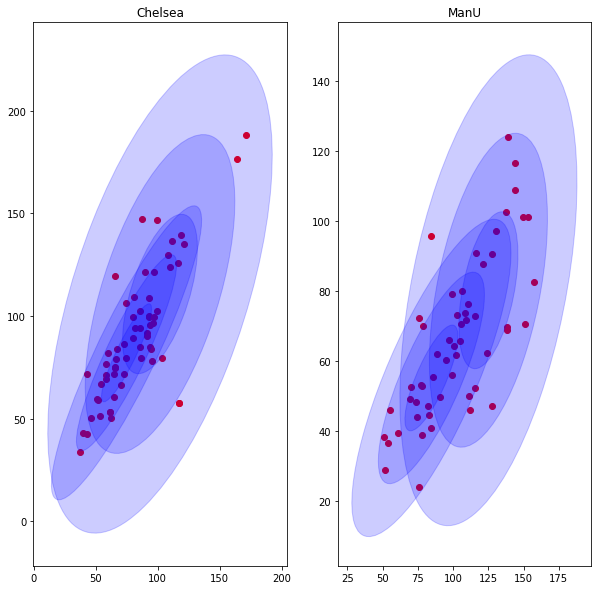

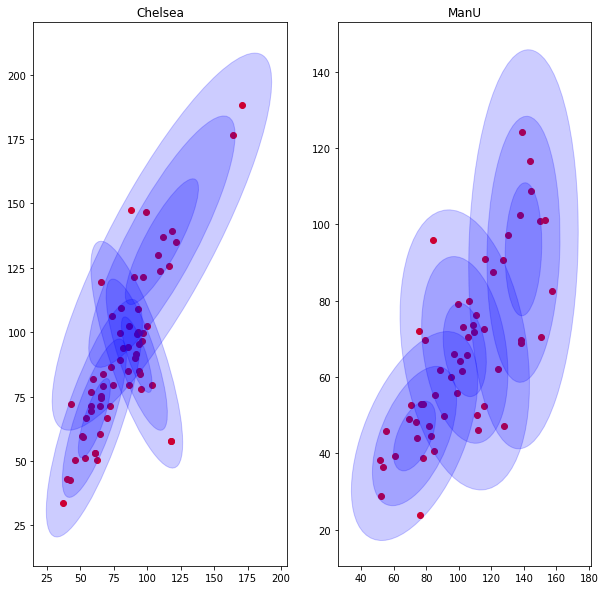

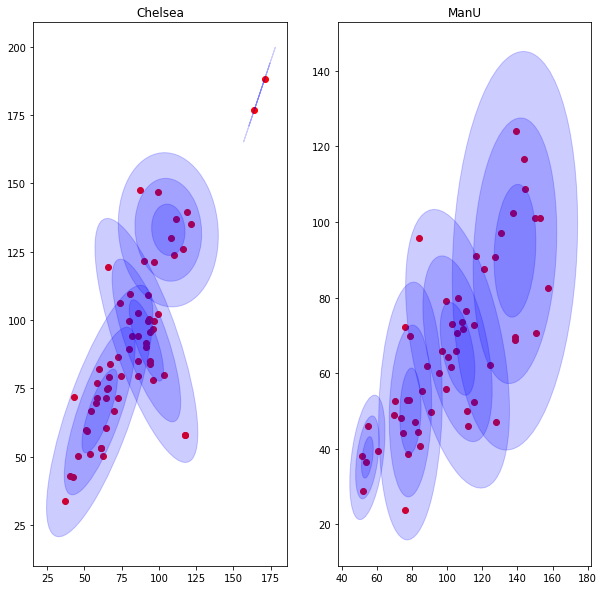

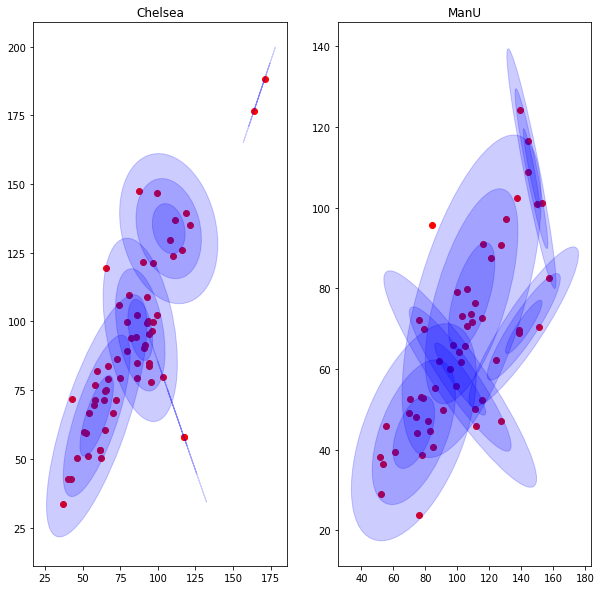

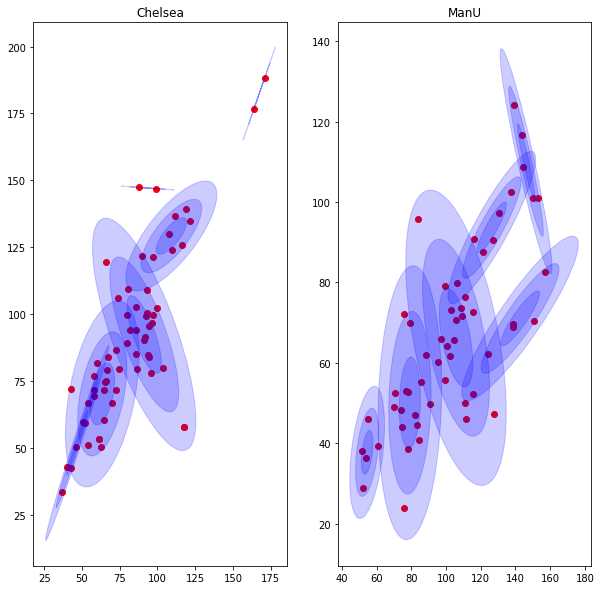

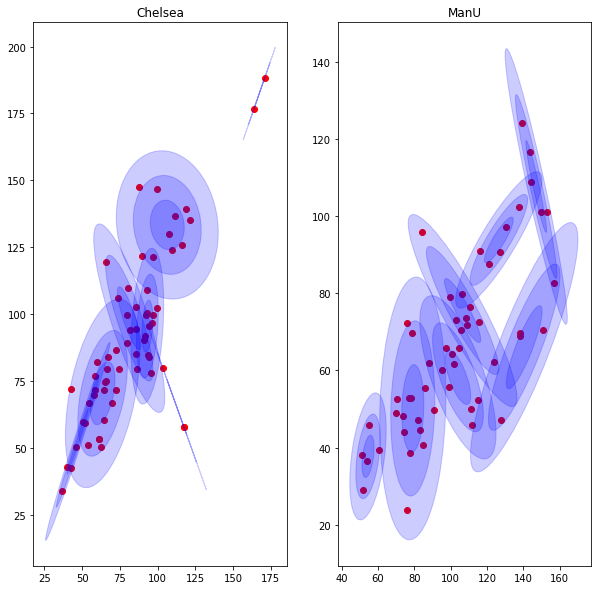

In [58]:
for n in range(2,8):
  clf = Chelsea_Man_Classifier()
  chel_model, bic = clf.train_model(chelsea_img, _n_components = n)
  chel_mean = chel_model.means_; chel_cov = chel_model.covariances_; chel_weights = chel_model.weights_; chel_data = clf.get_data()
  model, bic = clf.train_model(manu_img, _n_components = n)
  man_mean = model.means_; man_cov = model.covariances_; man_weights = model.weights_; man_data = clf.get_data()
  fig, axs =  plt.subplots(1, 2, figsize=(10, 10))
  plot_data_dist(chel_data, chel_mean, chel_cov ,axs[0])
  axs[0].set_title("Chelsea")
  plot_data_dist(man_data, man_mean, man_cov ,axs[1])
  axs[1].set_title("ManU")
  r = 3
  plotTable({1:["Mean ", "Cov Matrix"], 2:[np.round(chel_mean, decimals =r), np.round(chel_cov, decimals =r)],
           3:[np.round(man_mean, decimals = r),np.round(man_cov, decimals = r)]}, 
          ['Param Name', 'Chelsea', 'ManU'], 3)


In [55]:
r = 3
plotTable({1:["Mean ", "Cov Matrix"], 2:[np.round(chel_mean, decimals =r), np.round(chel_cov, decimals =r)],
           3:[np.round(man_mean, decimals = r),np.round(man_cov, decimals = r)]}, 
          ['Param Name', 'Chelsea', 'ManU'], 3)

╒══════════════╤═══════════════════════╤═══════════════════════╕
│  Param Name  │        Chelsea        │         ManU          │
╞══════════════╪═══════════════════════╪═══════════════════════╡
│     Mean     │  [[ 75.878  79.298]   │  [[ 88.708  58.185]   │
│              │   [111.484 138.798]]  │   [135.957  85.494]]  │
├──────────────┼───────────────────────┼───────────────────────┤
│  Cov Matrix  │  [[[421.563 284.306]  │  [[[395.544 229.861]  │
│              │   [284.306 451.164]]  │   [229.861 285.754]]  │
│              │                       │                       │
│              │   [[896.125 604.362]  │   [[191.821 147.96 ]  │
│              │   [604.362 567.18 ]]] │   [147.96  513.3  ]]] │
╘══════════════╧═══════════════════════╧═══════════════════════╛


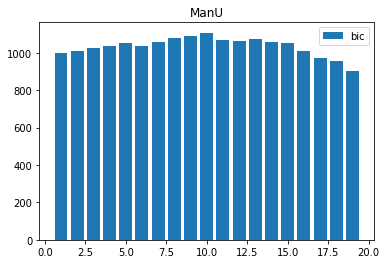

Text(0.5, 1.0, 'ManU')

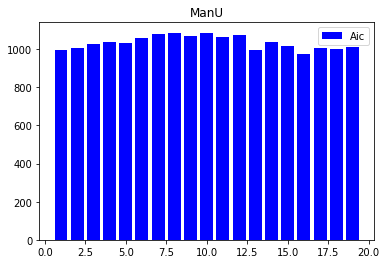

In [48]:
#%% BIC
bic_arr = []
n_components_range = range(1, 20)
for n in n_components_range:
    # Fit a Gaussian mixture with EM
    model, bic = clf.train_model(manu_img, _n_components = n)
    bic_arr.append(bic)
    
plt.bar(n_components_range ,bic_arr, label ="bic")
plt.legend()
plt.title("ManU")
plt.show()
plt.close()

#%% AIC

aic_arr = []
n_components_range = range(1, 20)
for n in n_components_range:
    # Fit a Gaussian mixture with EM
    model, aic = clf.train_model(manu_img, _n_components = n)
    aic_arr.append(aic)
    
plt.bar(n_components_range ,aic_arr, label ="Aic", color = 'b')
plt.legend()
plt.title("ManU")

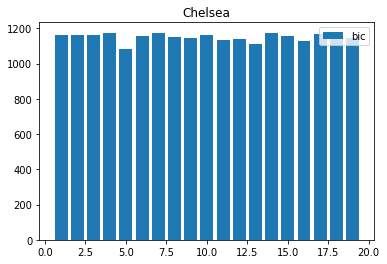

Text(0.5, 1.0, 'Chelsea')

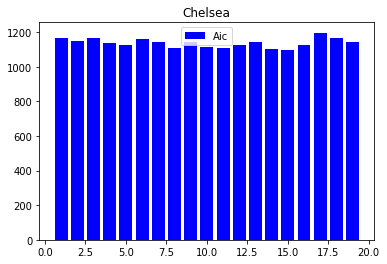

In [61]:
#%% BIC
bic_arr = []
n_components_range = range(1, 20)
for n in n_components_range:
    # Fit a Gaussian mixture with EM
    model, bic = clf.train_model(chelsea_img, _n_components = n)
    bic_arr.append(bic)
    
plt.bar(n_components_range ,bic_arr, label ="bic")
plt.legend()
plt.title("Chelsea")
plt.show()
plt.close()

#%% AIC

aic_arr = []
n_components_range = range(1, 20)
for n in n_components_range:
    # Fit a Gaussian mixture with EM
    model, aic = clf.train_model(chelsea_img, _n_components = n)
    aic_arr.append(aic)
    
plt.bar(n_components_range ,aic_arr, label ="Aic", color = 'b')
plt.legend()
plt.title("Chelsea")